In [1]:

## read mouse
## plot mouse speed over time

import glob
import pandas as pd

path = 'C:/Users/ZHT/Documents/dataProcess/Smog_mouse'
files  = glob.glob(path + '/*.json') 
smog_mouse =[]

for file in files:
    data = pd.read_json(file)
    filedata = {'filename':file, 'df':data}
    print(filedata['filename'])
    print(filedata['df'].shape)
    smog_mouse.append(filedata)

C:/Users/ZHT/Documents/dataProcess/Smog_mouse\Heting.json
(4870, 3)
C:/Users/ZHT/Documents/dataProcess/Smog_mouse\HY.json
(3658, 3)
C:/Users/ZHT/Documents/dataProcess/Smog_mouse\Jia.json
(8786, 3)
C:/Users/ZHT/Documents/dataProcess/Smog_mouse\Lin.json
(7561, 3)
C:/Users/ZHT/Documents/dataProcess/Smog_mouse\Xiaochun.json
(13189, 3)
C:/Users/ZHT/Documents/dataProcess/Smog_mouse\Ziyi.json
(4991, 3)


In [7]:

## read mouse
## plot mouse speed over time

import glob
import pandas as pd

path = 'C:/Users/ZHT/Documents/dataProcess/Smog_frame'
files  = glob.glob(path + '/*.json') 
smog_frame =[]

for file in files:
    data = pd.read_json(file)
    filedata = {'filename':file, 'df':data}
    print(filedata['filename'])
    print(filedata['df'].shape)
    smog_frame.append(filedata)

C:/Users/ZHT/Documents/dataProcess/Smog_frame\HY-08-25-16-55-01-2024.json
(8398, 5)
C:/Users/ZHT/Documents/dataProcess/Smog_frame\Jia-08-26-10-07-13-2024.json
(11605, 5)
C:/Users/ZHT/Documents/dataProcess/Smog_frame\Lin-08-25-13-37-38-2024.json
(16983, 5)
C:/Users/ZHT/Documents/dataProcess/Smog_frame\Xiaochun-08-26-17-39-24-2024.json
(25009, 5)
C:/Users/ZHT/Documents/dataProcess/Smog_frame\Ziyi-08-26-18-49-28-2024.json
(9687, 5)


In [8]:
print(smog_frame[0]['filename'])
print(smog_mouse[0]['filename'])

C:/Users/ZHT/Documents/dataProcess/Smog_frame\HY-08-25-16-55-01-2024.json
C:/Users/ZHT/Documents/dataProcess/Smog_mouse\Heting.json


In [9]:
def framePonSplit(i,df):
    df[f'{i}_ponX'] = df['ponPos'].apply(lambda x: x[i]['X'])
    df[f'{i}_ponY'] = df['ponPos'].apply(lambda x: x[i]['Y'])
    #print(df.shape)

df =  smog_frame[0]['df']
df = df[df['ponPos'].apply(lambda x: x != [])]
df.reset_index(inplace=True)
for i in range(5):
    framePonSplit(i,df)

smogframe0 = df
tkept = smogframe0['timeStamp']

#pd.options.mode.chained_assignment = None
df = smog_mouse[0]['df']
mouse = df[df['timestamp'].isin(tkept)]
mouse['mouseX'] = mouse['mousePOs'].apply(lambda x: x['X'])
mouse['mouseY'] = mouse['mousePOs'].apply(lambda x: x['Y'])
mouse['timeStamp']=mouse['timestamp']
mouse_frame_merge = pd.merge(mouse, smogframe0, on='timeStamp')

def mergeclean(i,mouse_frame_merge):
    return  mouse_frame_merge[['timeStamp','mouseX','mouseY',f'{i}_ponX',f'{i}_ponY']]

merge1 = mergeclean(1,mouse_frame_merge)


C:\Users\ZHT\AppData\Local\Temp\ipykernel_27980\3369002074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{i}_ponX'] = df['ponPos'].apply(lambda x: x[i]['X'])
C:\Users\ZHT\AppData\Local\Temp\ipykernel_27980\3369002074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{i}_ponY'] = df['ponPos'].apply(lambda x: x[i]['Y'])
C:\Users\ZHT\AppData\Local\Temp\ipykernel_27980\3369002074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Δd = sqrt( (x2-x1)^2 + (y2-y1)^2 )  # 位移变化量（欧氏距离）
Δt = t2 - t1                        # 时间变化量
velocity = Δd / Δt                   # 瞬时速度（像素/秒）

(0.0, 1080.0)

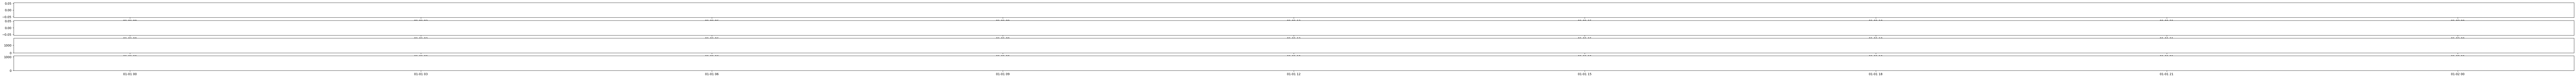

In [10]:




import matplotlib.pyplot as plt
#import mpld3
#mpld3.enable_notebook()

fig, ax = plt.subplots(4,1, figsize=(150, 4))
ax[0].scatter(mouse_frame_merge['timeStamp'],mouse_frame_merge['mouseX'])
ax[1].scatter(mouse_frame_merge['timeStamp'],mouse_frame_merge['mouseY'])
ax[2].scatter(mouse_frame_merge['timeStamp'],mouse_frame_merge['1_ponX'])
ax[2].set_ylim(0, 1920)
ax[3].scatter(mouse_frame_merge['timeStamp'],mouse_frame_merge['1_ponY'])
ax[3].set_ylim(0, 1080)

C:\Users\ZHT\AppData\Local\Temp\ipykernel_27980\1525697580.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ponX'] = df['ponPos'].apply(lambda x: x[1]['X'])
C:\Users\ZHT\AppData\Local\Temp\ipykernel_27980\1525697580.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ponY'] = df['ponPos'].apply(lambda x: x[1]['Y'])


(0.0, 1080.0)

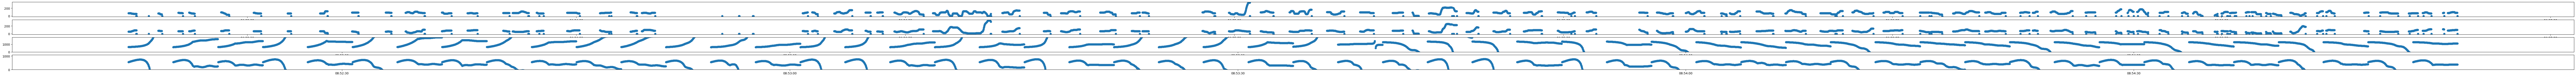

In [11]:
df = pd.DataFrame(smog_mouse[0]['df']['mousePOs'])
df['X'] = df['mousePOs'].apply(lambda x: x['X'])
df['Y'] = df['mousePOs'].apply(lambda x: x['Y'])
smog_mouse[0]['df']['X'] = df['X']
smog_mouse[0]['df']['Y'] = df['Y']
smog_mouse[0]['df'].drop(['mousePOs'],axis=1)

import matplotlib.pyplot as plt
#import mpld3
#mpld3.enable_notebook()

df = smog_frame[0]['df']
df = df[df['ponPos'].apply(lambda x: x != [])]
df.reset_index(inplace=True)
df['ponX'] = df['ponPos'].apply(lambda x: x[1]['X'])
df['ponY'] = df['ponPos'].apply(lambda x: x[1]['Y'])
fig, ax = plt.subplots(4,1, figsize=(150, 4))
ax[0].scatter(smog_mouse[0]['df']['timestamp'],smog_mouse[0]['df']['X'])
ax[1].scatter(smog_mouse[0]['df']['timestamp'],smog_mouse[0]['df']['Y'])
ax[2].scatter(df['timeStamp'],df['ponX'])
ax[2].set_ylim(0, 1920)
ax[3].scatter(df['timeStamp'],df['ponY'])
ax[3].set_ylim(0, 1080)


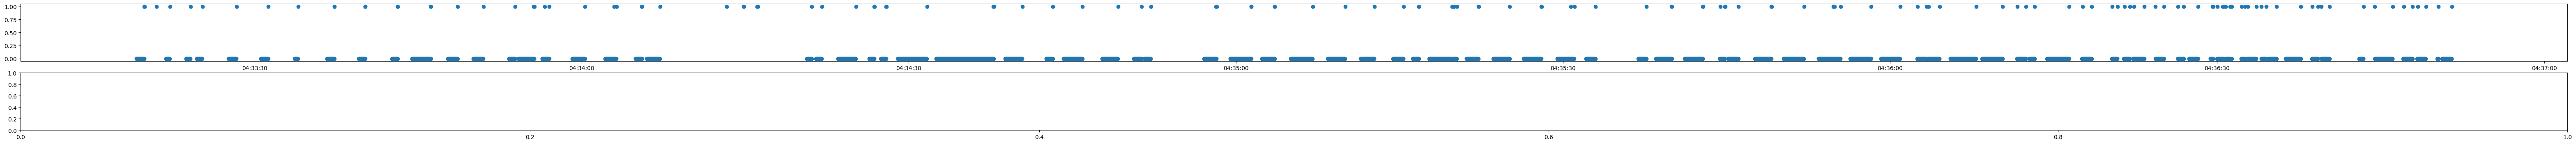

In [12]:
import matplotlib.pyplot as plt
#import mpld3
#mpld3.enable_notebook()

fig, ax = plt.subplots(2,1, figsize=(80, 4))
ax[0].scatter(smog_mouse[0]['df']['timestamp'],smog_mouse[0]['df']['buttonUP'])



(0.0, 1080.0)

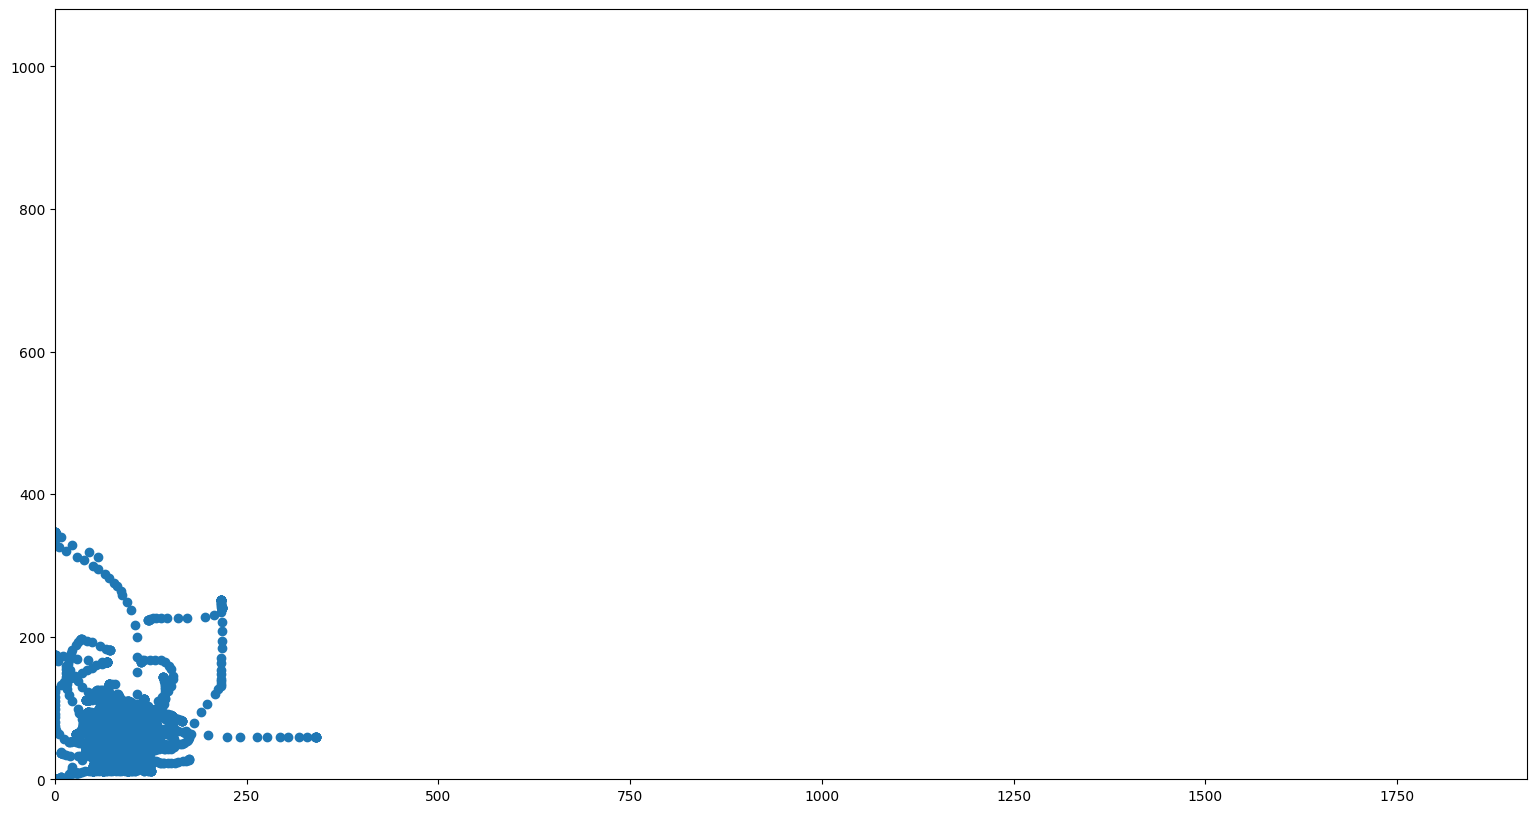

In [13]:
plt.figure(figsize=(19,10))
plt.scatter(smog_mouse[0]['df']['X'],smog_mouse[0]['df']['Y'])

plt.xlim(0, 1920)
plt.ylim(0, 1080)

In [14]:

mouse_frame_merge


,timestamp,mousePOs,buttonUP,mouseX,mouseY,timeStamp,index,frameTag,targetpos,cannonpos,...,0_ponX,0_ponY,1_ponX,1_ponY,2_ponX,2_ponY,3_ponX,3_ponY,4_ponX,4_ponY


In [15]:

import seaborn as sns
dfcorr = mouse_frame_merge[['mouseX','mouseY','ponX','ponY']]
dfcorr.isnull().any()
vmax=1
vmin1=0
sns.heatmap(dfcorr,annot=False , vmin=vmin1, vmax=vmax)

KeyError: "['ponX', 'ponY'] not in index"